# WestNileVirus-Kaggle

https://www.kaggle.com/c/predict-west-nile-virus

In [1]:
import pandas as pd
import os

In [2]:
directory_path="/Users/eran/Galvanize_more_repositories/WestNileVirus/all/"
directory_path

'/Users/eran/Galvanize_more_repositories/WestNileVirus/all/'

## Train data

In [3]:
train_csv=os.path.join(directory_path, "train.csv")

In [4]:
# Reading in the train data
train=pd.read_csv(train_csv)

## EDA

### general info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
Date                      10506 non-null object
Address                   10506 non-null object
Species                   10506 non-null object
Block                     10506 non-null int64
Street                    10506 non-null object
Trap                      10506 non-null object
AddressNumberAndStreet    10506 non-null object
Latitude                  10506 non-null float64
Longitude                 10506 non-null float64
AddressAccuracy           10506 non-null int64
NumMosquitos              10506 non-null int64
WnvPresent                10506 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 985.0+ KB


In [6]:
train.head(3)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0


### Investigating specific columns: 'Species' and 'Traps' and 'AddressAccuracy'

In [7]:
train['Species'].unique() ## 6 different species

array(['CULEX PIPIENS/RESTUANS', 'CULEX RESTUANS', 'CULEX PIPIENS',
       'CULEX SALINARIUS', 'CULEX TERRITANS', 'CULEX TARSALIS',
       'CULEX ERRATICUS'], dtype=object)

In [8]:
len(train['Trap'].unique()) ## 136 different traps

136

In [9]:
train['AddressAccuracy'].describe() ## this is (according to description) the accuracy as returned from geo-locator

count    10506.000000
mean         7.819532
std          1.452921
min          3.000000
25%          8.000000
50%          8.000000
75%          9.000000
max          9.000000
Name: AddressAccuracy, dtype: float64

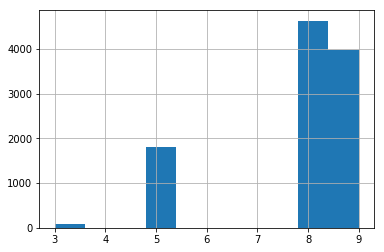

In [44]:
train['AddressAccuracy'].hist() ## so most accuracy's are 8 and 9, some 5 and very little 3. 
# Later this could split into 3,4 categories and then into 3,4 dummie features 

### ploting histogram (count) of count vs specie and whether there is WMV (color) 

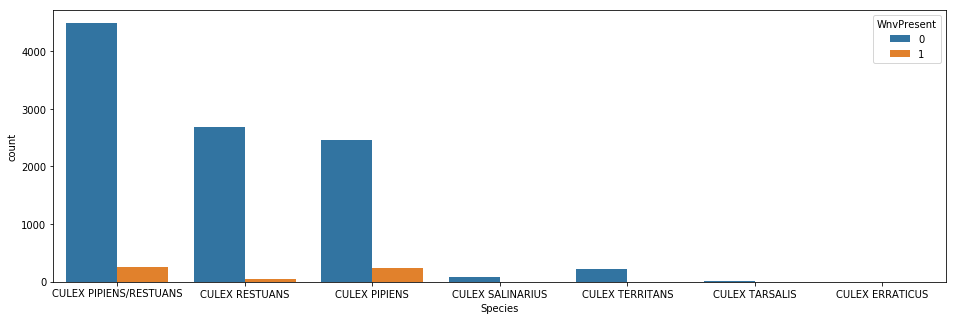

In [51]:
#looking at bars of every specie whether it has virus (orange) or not (blue)
# (to see if there is relationship between the species and the appearence of virus)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib  inline
dim=(16,5)
plt.subplots(figsize=dim)
sns.countplot('Species',data=train,hue='WnvPresent',)
# seems that only 3 species are really prevalent.
# "Culex Pipiens" has the highest relative portion of WMV ~10% 

### doing dummies out of species

In [11]:
# make new train with dummies
trainWdum=pd.get_dummies(train,columns=['Species'],drop_first=True)

In [12]:
trainWdum.describe()

,Block,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,35.687797,41.841139,-87.699908,7.819532,12.853512,0.052446,0.256901,0.452313,0.260803,0.008186,0.000571,0.021131
std,24.339468,0.112742,0.096514,1.452921,16.133816,0.222936,0.436945,0.497744,0.439094,0.090109,0.023892,0.143827
min,10.000000,41.644612,-87.930995,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,41.732984,-87.760070,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33.000000,41.846283,-87.694991,8.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,52.000000,41.954690,-87.627796,9.000000,17.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,98.000000,42.017430,-87.531635,9.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Getting baseline accuracy of predicting WNV 
let's understand the predictive capability of this data set without additional spreadsheets and without feature engineering:

In [13]:
trainBasic=trainWdum[['Latitude','Longitude','AddressAccuracy','NumMosquitos','Species_CULEX PIPIENS','Species_CULEX PIPIENS/RESTUANS','Species_CULEX RESTUANS','Species_CULEX SALINARIUS','Species_CULEX TARSALIS','Species_CULEX TERRITANS','WnvPresent']]

In [14]:
trainBasic.head(2)

,Latitude,Longitude,AddressAccuracy,NumMosquitos,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,WnvPresent
0,41.95469,-87.800991,9,1,0,1,0,0,0,0,0
1,41.95469,-87.800991,9,1,0,0,1,0,0,0,0


In [15]:
y=trainBasic['WnvPresent']
X=trainBasic.drop('WnvPresent',1)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
## stratify makes sure that ratio

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
pred=log_reg.predict(X_test)

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
target_names=['No Virus','Virus']
print(classification_report(y_test, pred, target_names=target_names))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred))
print("_____________________")
print("accuracy = ",round(accuracy_score(y_test,pred),3))

             precision    recall  f1-score   support

   No Virus       0.95      1.00      0.97      1992
      Virus       0.00      0.00      0.00       110

avg / total       0.90      0.95      0.92      2102

[[1992    0]
 [ 110    0]]
_____________________
accuracy =  0.948


/Users/eran/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
#               predicted.NO (-) predicted.Yes (+)
# actual NO (F)          1992            0
# actual Yes (T)          110            0

# accuracy = 1992/2102= 94.7% # (looking at all the predicted correctly - (TP+TN)/all )
# precision=0/0= 0  #(looking at predicted.yes column only)
# recall=0/110 = 0  #(looking at actual.yes column only)
# F1_score= 2/(1/0+1/0)=0  #2/(1/precision+ 1/recall) (weighted average between precision and recall) 

Although accuracy is very high ~95% it's because it easy to predict that there is no virus because it's rare. but in cases where there is a virus, none where detected as we can see looking at the precision and recall equal to 0.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
yknn_pred=knn.predict(X_test)

In [22]:
print(classification_report(y_test, yknn_pred, target_names=target_names))
print(confusion_matrix(y_test,yknn_pred))
print("______________")
print("accuracy = ",round(accuracy_score(y_test,yknn_pred),3))

             precision    recall  f1-score   support

   No Virus       0.95      0.99      0.97      1992
      Virus       0.33      0.07      0.12       110

avg / total       0.92      0.94      0.93      2102

[[1976   16]
 [ 102    8]]
______________
accuracy =  0.944


In [62]:
from sklearn.metrics import f1_score
k_range=range(1,15)
accur=[]
f1list=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acck=accuracy_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    accur.append(acck)
    f1list.append(f1)

/Users/eran/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0,0.5,'f1_score')

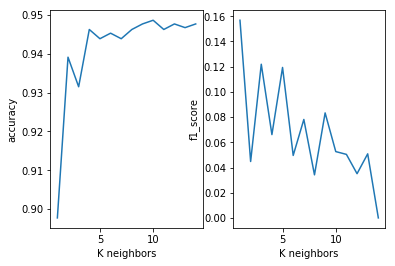

In [67]:
plt.subplot(1,2,1)
plt.plot(k_range,accur)
plt.xlabel('K neighbors')
plt.ylabel('accuracy')
plt.subplot(1,2,2)
plt.plot(k_range,f1list)
plt.xlabel('K neighbors')
plt.ylabel('f1_score')

because of the scarcity of incidence of WMV, the model is not better than a "dumb" model of predicting "No 
VIrus" every time 

We can see that by increasing the bias ("dumbing" the model) we don't see decrease in accuracy as we'd expect

f1_score (weighted average of precision and recall) is only dimished when the k are larger 

## Spray data

In [25]:
spray_csv=os.path.join(directory_path,"spray.csv")

In [26]:
spray=pd.read_csv(spray_csv)

In [27]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [28]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [29]:
# there are nulls in the df in the Time column. where?

In [30]:
nulls=spray[spray['Time'].isnull()] 
## there - spray.loc[1030:1613]
nulls.head()

,Date,Time,Latitude,Longitude
1030,2011-09-07,NaN,41.987092,-87.794286
1031,2011-09-07,NaN,41.987620,-87.794382
1032,2011-09-07,NaN,41.988004,-87.794574
1033,2011-09-07,NaN,41.988292,-87.795486
1034,2011-09-07,NaN,41.988100,-87.796014


In [31]:
nulls.tail()

,Date,Time,Latitude,Longitude
1609,2011-09-07,NaN,41.995876,-87.811615
1610,2011-09-07,NaN,41.995972,-87.810271
1611,2011-09-07,NaN,41.995684,-87.810319
1612,2011-09-07,NaN,41.994724,-87.810415
1613,2011-09-07,NaN,41.993092,-87.810415


In [32]:
# is it just one day? how many days did they spray around?
spray['Date'].unique()
# ten days:

array(['2011-08-29', '2011-09-07', '2013-07-17', '2013-07-25',
       '2013-08-08', '2013-08-15', '2013-08-16', '2013-08-22',
       '2013-08-29', '2013-09-05'], dtype=object)

In [33]:
# example of how many observation for 1 location:
df1location=trainWdum[(trainWdum['Latitude']==41.954690) & (trainWdum['Longitude']==-87.800991)]
len(df1location)

185

In [34]:
df1location.head(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0,0,1,0,0,0,0


In [35]:
df1location.tail(1)

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
10415,2013-09-26,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,8,0,1,0,0,0,0,0


In [36]:
## two rows in the train data: same date place etc. just the species are differen 
train.iloc[1]==train.iloc[0]

Date                       True
Address                    True
Species                   False
Block                      True
Street                     True
Trap                       True
AddressNumberAndStreet     True
Latitude                   True
Longitude                  True
AddressAccuracy            True
NumMosquitos               True
WnvPresent                 True
dtype: bool

In [37]:
# there are 185 records from the same location collected in 67 dates
len(df1location['Date'].unique())

67

In [38]:
spray[(spray['Latitude'].round(6)==42.391348) & (spray['Longitude'].round(6)==-88.089163)] 

,Date,Time,Latitude,Longitude
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [39]:
spray[spray['Latitude'].round(6)==42.391348]

,Date,Time,Latitude,Longitude
1,2011-08-29,6:57:08 PM,42.391348,-88.089163


In [40]:
trainWdum[(trainWdum['Latitude'].round(6)==42.391348) & (trainWdum['Longitude'].round(6)==-88.089163)]

,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS


## Weather data

In [41]:
weather_csv=os.path.join(directory_path,"weather.csv")
weather=pd.read_csv(weather_csv)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [42]:
weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4


In [43]:
weather['Station'].unique()
# Station 1: CHICAGO O'HARE INTERNATIONAL AIRPORT Lat: 41.995 Lon: -87.933 Elev: 662 ft. above sea level
# Station 2: CHICAGO MIDWAY INTL ARPT Lat: 41.786 Lon: -87.752 Elev: 612 ft. above sea level

array([1, 2])